# Hugging Face BPE Tokenizer
https://github.com/huggingface/tokenizers/tree/master/bindings/python

## 학습용 파일 읽기

---

## 1. Word Piece Model (WPM)

### 1) WPM 학습

In [12]:
modelpath = "../../model/"
filepath = "../../data/"
category = "정치"

In [13]:
import os
import pandas as pd
from pathlib import Path
import unicodedata

def combine_files(filefolder, category, min_len = 100) :
    pattern = "*_{}_*.json".format(category)
    df_li = []
    for path in Path(filefolder).rglob("*.json"):
        if unicodedata.normalize('NFC',str(path)).find(category) > 0 :
            try : 
                tmp_df = pd.read_json(open(path, "r", encoding="utf8"))
                tmp_df = tmp_df[tmp_df['content'].apply(len) > min_len] #지정 길이 이상의 데이터만 조회
                tmp_df = tmp_df[tmp_df['category1'].apply(len) < 20]
                tmp_df = tmp_df[tmp_df['category2'].apply(len) < 20]
                if (tmp_df.shape[0] > 0) :
                    df_li.append(tmp_df) 
            except Exception as e:
                print("Error file : {}".format(path))
                print("Error message : {}".format(str(e)))
            #print(path)
            
    df = pd.concat(df_li, sort=False)
    print("{} rows returned".format(df.shape[0]))
    return df
    
#df = combine_files("../../data/2019", "정치")
#df['content'].to_csv(file, index=False)

In [6]:
from tokenizers import BertWordPieceTokenizer

def train_bertWPM(filepath, category, modelpath) :
    tokenizer = BertWordPieceTokenizer()
    tokenizer.train(['{}{}.csv'.format(filepath, category)])
    tokenizer.save(modelpath, category)
    
#t = train_bertWPM(filepath, category, modelpath)
#t.save(modelpath, category)

In [14]:
modelpath = "../../model/"
filepath = "../../data/"
category = "정치"

def train(category, modelpath, filepath) : 
    df = combine_files("../../data/2019", category)
    df.to_csv("{}{}.csv".format(filepath, category), index=False)
    df['content'].to_csv("{}{}_content.csv".format(filepath, category), index=False)
    #train_bertWPM(filepath, category, modelpath)
    
 

In [15]:
train('경제', modelpath, filepath)   

Error file : ../../data/2019/03/24/20190324_경제_글로벌경제 2.json
Error message : Expected object or value
Error file : ../../data/2019/05/13/20190513_경제_금융 2.json
Error message : Unexpected character found when decoding array value (2)
Error file : ../../data/2019/05/13/20190513_경제_글로벌경제 2.json
Error message : Unexpected character found when decoding array value (2)
1611528 rows returned


In [16]:
train('사회', modelpath, filepath)    

Error file : ../../data/2019/01/03/20190103_사회_인권복지 3.json
Error message : Expected object or value
Error file : ../../data/2019/01/04/20190104_사회_인권복지 2.json
Error message : Expected object or value
Error file : ../../data/2019/01/05/20190105_사회_인권복지 2.json
Error message : Expected object or value
Error file : ../../data/2019/01/02/20190102_사회_인권복지 3.json
Error message : Expected object or value
Error file : ../../data/2019/01/11/20190111_사회_인권복지 2.json
Error message : Expected object or value
Error file : ../../data/2019/01/16/20190116_사회_인권복지 2.json
Error message : Expected object or value
Error file : ../../data/2019/01/10/20190110_사회_인권복지 2.json
Error message : Expected object or value
Error file : ../../data/2019/01/07/20190107_사회_인권복지 2.json
Error message : Expected object or value
Error file : ../../data/2019/01/09/20190109_사회_인권복지 2.json
Error message : Expected object or value
Error file : ../../

In [17]:
train('IT과학', modelpath, filepath)    

262363 rows returned


In [18]:
train('생활문화', modelpath, filepath)    

Error file : ../../data/2019/03/24/20190324_생활문화_종교 2.json
Error message : Expected object or value
Error file : ../../data/2019/03/24/20190324_생활문화_음식맛집 2.json
Error message : Expected object or value
Error file : ../../data/2019/03/24/20190324_생활문화_패션뷰티 2.json
Error message : Expected object or value
Error file : ../../data/2019/03/24/20190324_생활문화_날씨 2.json
Error message : Expected object or value
Error file : ../../data/2019/03/24/20190324_생활문화_책 2.json
Error message : Expected object or value
Error file : ../../data/2019/03/24/20190324_생활문화_도로교통 2.json
Error message : Expected object or value
Error file : ../../data/2019/03/24/20190324_생활문화_자동차시승기 2.json
Error message : Expected object or value
Error file : ../../data/2019/03/24/20190324_생활문화_여행레저 2.json
Error message : Expected object or value
Error file : ../../data/2019/03/24/20190324_생활문화_건강정보 2.json
Error message : Exp

In [19]:
train('정치', modelpath, filepath)  

1202730 rows returned


In [39]:
from tokenizers import BertWordPieceTokenizer

def load_bertWPM(modelpath, modelname)
    # Load a BPE Model
    vocab = "{}/{}-vocab.txt".format(modelpath, modelname)
    return = BertWordPieceTokenizer(vocab)

In [29]:
from konlpy.tag import Mecab
from collections import defaultdict
import pandas as pd
import unicodedata

def create_dict(modelpath, modelname) :
    def combine_tokens(tokens, pos = "NNP") :
        return ''.join([t[0] for t in tokens]), pos
    
    file = open("{}{}-vocab.txt".format(modelpath, modelname), 'r') 
    vocabs = file.read().split('\n')
    vocabs = [unicodedata.normalize('NFC',vocab) for vocab in vocabs if  ("#" not in vocab)]


    mecab = Mecab()
    dct = defaultdict()
    dic = []

    for vocab in vocabs :    
        word = ""
        pos = ""

        tokens = mecab.pos(vocab.replace("##",""))

        if len(tokens) == 1 :
            continue
        elif  len(tokens) >1 : 
            pos_list = [t[1][0] for t in tokens]
            word = pos = ""

            if "의" in vocab[-1] :
                if vocab[-2:] in ["들의", "과의", "와의"] :
                    tokens = mecab.pos(vocab[:-2])
                    vocab = vocab[:-2]
                elif vocab[-2:] == "주주의" :
                    tokens = mecab.pos(vocab[:-1])
                    vocab = vocab[:-1]
                elif vocab[-2:] == "회의" :
                    word, pos = combine_tokens(tokens)         
                else :
                    tokens = mecab.pos(vocab[:-1])
                    if (len(tokens) == 1) | ('SY' in [t[1] for t in tokens]) :
                        continue
            elif list(set(pos_list)) == ["N"] : 
                pass         
            elif 'SY' in [t[1] for t in tokens] :
                continue
            elif (tokens[-1][1] in ["NNG", "NNP"]) :
                pos = tokens[-1][1]
            elif ('N' in pos_list ) & (len(pos_list) > 3) :
                continue
            elif 'N' not in pos_list :
                continue    
            else :            
                continue 

            word, pos = combine_tokens(tokens) 
            return dic.append((word, pos, tokens))
              
dic = create_dict(modelpath, category)                

Exception: Install MeCab in order to use it: http://konlpy.org/en/latest/install/

In [107]:
print(len(dic))
for t in dic[:10] :
    print(t)

'대북특별대표' in [w[0] for w in dic]

2196
('재배포', 'NNP', [('재', 'XPN'), ('배포', 'NNG')])
('정치일반', 'NNP', [('정치', 'NNG'), ('일반', 'NNG')])
('무단전재', 'NNP', [('무단', 'NNG'), ('전재', 'NNG')])
('더불어민주당', 'NNP', [('더불', 'VV'), ('어', 'EC'), ('민주당', 'NNP')])
('공감언론', 'NNP', [('공감', 'NNG'), ('언론', 'NNG')])
('바른미래', 'NNP', [('바른', 'VA+ETM'), ('미래', 'NNG')])
('국회의', 'NNP', [('국', 'NNG'), ('회의', 'NNG')])
('뉴시스통신사', 'NNP', [('뉴시스', 'NNP'), ('통신사', 'NNG')])
('기자회견', 'NNP', [('기자', 'NNG'), ('회견', 'NNG')])
('비례대표', 'NNP', [('비례', 'NNG'), ('대표', 'NNG')])


True

In [ ]:
def tokenize(category, text) :
    tokenized_text = []
    return tokenized_text

### 2) WPM 활용 토큰화

In [15]:
# Multiprocessing 으로 변경
import re
import numpy as np

def tokenizeBySplit(contents) :
    hangul = re.compile('[^ \u3131-\u3163\uac00-\ud7a3]+')

    tokenized_text = []
    cnt = 1

    for content in contents :
        try :
            if content == np.nan :
                continue 
                
            text = hangul.sub('', content)
            tokenized_text = tokenized_text + [w for w in tokenizer.encode(text).tokens if len(w) > 1]

            cnt += 1
            if cnt % 1000 == 0 : 
                print("{} / {}".format(cnt, len(contents)))
        except Exception as e:
            continue
            #print(str(e))
            #print(content)
            
    return tokenized_text

import multiprocessing

def tokenize(contents) :
    chunk_size = int(len(contents)/multiprocessing.cpu_count())-3
    li_split = [contents[i:i + chunk_size] for i in range(0, len(contents), chunk_size)]
    pool = multiprocessing.Pool(processes=multiprocessing.cpu_count())
    ret = pool.map(tokenizeBySplit, li_split)
    
    tokenized_text = []
    for text in ret :
        #print(text)
        tokenized_text = tokenized_text + [token.replace("##","").replace("▁","") for token in text if (token not in ('[CLS]','[SEP]','[UNK]')) & (len(token.replace("##",""))>1)]
    
    return tokenized_text

tokenized_text = tokenize(contents[:100])

In [16]:
tokenized_text[0]

'동영상'

### 3) 토큰 분포 확인

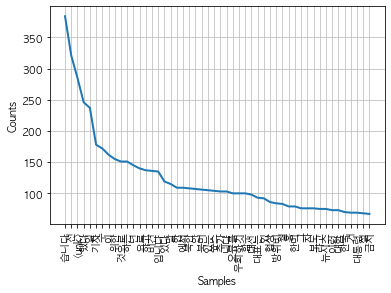

In [21]:
import nltk
from nltk import FreqDist
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

def calFreqDist(tokenized_text) :
    fdist=FreqDist(tokenized_text)
    rc('font', family='AppleGothic')
    fdist.plot(50)
    return fdist

fdist = calFreqDist(tokenized_text)

In [22]:
len(tokenized_text)

38580

In [24]:
from konlpy.tag import Mecab
import pandas as pd

def genVoab(fdist, name) :
    mecab = Mecab()
    vocab = []

    for w in fdist.most_common(10000) :
        pos = mecab.pos(w[0])
        if (pos[0][1][0] == "N") & (len(pos[0][0]) > 1) & (len(pos)>1) & (w[1]>100):
            m = str(pos)
            b = "".join([p[0] for p in pos])
            p = ",".join([p[1] for p in pos])
            f = w[1]
            #print(str(pos) + " " + str(w[1]) + " " + str(b))
            vocab.append((m,p,b,f))

    return pd.DataFrame(vocab, columns=['Mecab', 'PoS', name, 'Freq'])

df = genVoab(fdist, "WPM")
df.to_csv("./dict_wpm.csv")
df.head(50)        

,Mecab,PoS,WPM,Freq


---

## Sentence Piece Model (SPM)

In [9]:
from tokenizers import SentencePieceBPETokenizer
tokenizer = SentencePieceBPETokenizer()
tokenizer.train(files)
tokenizer.save("./model/spm/", modelname)

['./model/spm/bpe_20200319-vocab.json', './model/spm/bpe_20200319-merges.txt']

In [17]:
from tokenizers import SentencePieceBPETokenizer

# Load a BPE Model
vocab = "./model/spm/{}-vocab.json".format(modelname)
merges = "./model/spm/{}-merges.txt".format(modelname)
tokenizer = SentencePieceBPETokenizer(vocab, merges)

In [18]:
tokenized_text = tokenize(contents[:100])

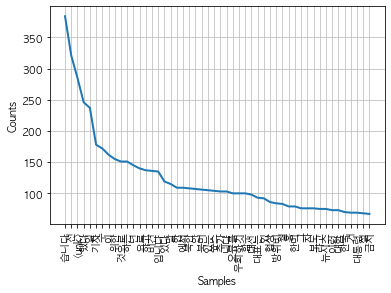

In [25]:
fdist = calFreqDist(tokenized_text)

In [26]:
df = genVoab(fdist, "SPM")
df.to_csv("./dict_spm.csv")
df.head(50)        

,Mecab,PoS,SPM,Freq


---

In [1]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab.pos('자유한국당한국당예비후보때문에가능성국민들미래통합당필리버스터험지출마') # 사전등록후 Mecab

[('자유한국당', 'NNP'),
 ('한국당', 'NNP'),
 ('예비', 'NNG'),
 ('후보', 'NNG'),
 ('때문', 'NNB'),
 ('에', 'JKB'),
 ('가능', 'NNG'),
 ('성', 'XSN'),
 ('국민', 'NNG'),
 ('들', 'XSN'),
 ('미래통합당', 'NNP'),
 ('필리버스터', 'NNP'),
 ('험지출마', 'NNP')]

In [27]:
tokenizer.encode('자유한국당한국당예비후보때문에가능성국민들미래통합당필리버스터험지출마').tokens

['▁자유한국당',
 '한국당',
 '예비후보',
 '때',
 '문에',
 '가능',
 '성',
 '국민',
 '들',
 '미래통합당',
 '필리버스터',
 '험지',
 '출마']